<a href="https://colab.research.google.com/github/AmitBenDavid91/AmitBenDavid91/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab Notebook - Project - VGG
# University: Bar-Ilan
# Course: Python Programming Workshop (88-6961)
# Lecturer: Dr. Michael Michaeli

In [22]:
!git clone https://github.com/AmitBenDavid91/AmitBenDavid91.git

fatal: destination path 'AmitBenDavid91' already exists and is not an empty directory.



## Introduction to VGG Networks

VGG networks were developed by the Visual Geometry Group at Oxford and have become one of the most influential convolutional neural network (CNN) architectures. Their design philosophy is rooted in simplicity and depth, which has led to significant improvements in image recognition tasks.

### Depth and Architecture

- **Uniform Architecture:**  
  VGG networks use a very consistent architecture where multiple convolutional layers are stacked together, typically with small $(3 \times 3)$ filters. This uniformity simplifies the design and implementation, while still capturing complex patterns.

- **Deep Structure:**  
  Popular variants like VGG-16 and VGG-19 have 16 and 19 weight layers, respectively. The depth of these networks enables them to learn highly abstract features by progressively combining simple features into more complex ones.

### Convolutional Layers

- **Small Receptive Fields:**  
  By using small $(3 \times 3)$ filters, VGG networks capture fine-grained details in the input images. Despite the small filter size, stacking multiple layers increases the effective receptive field, allowing the network to understand larger patterns.

- **Non-linearity:**  
  Each convolutional layer is typically followed by a non-linear activation function (such as ReLU), which introduces non-linearity into the model. This is crucial for learning complex representations from data.

### Pooling and Fully Connected Layers

- **Pooling Layers:**  
  Pooling layers are interleaved between blocks of convolutional layers to reduce the spatial dimensions of the data. This not only reduces computational complexity but also makes the learned features invariant to small translations in the input.

- **Fully Connected Layers:**  
  After several convolution and pooling operations, the network transitions to fully connected layers that aggregate the features and perform the final classification. This structure is similar to traditional multilayer perceptrons and is responsible for mapping the abstract features to specific classes.

## Advantages of the VGG Architecture

1. **Simplicity and Consistency:**  
   The uniform architecture makes it easier to implement and understand. Every convolutional block follows a similar pattern, which has inspired many subsequent designs in CNN research.

2. **Strong Feature Extraction:**  
   With many layers and small filters, VGG networks are highly effective at extracting detailed features from images. This strength has made them a popular choice for various computer vision tasks beyond classification, such as object detection and segmentation.

3. **Transfer Learning:**  
   Due to their robustness and pre-training on large datasets like ImageNet, VGG models are often used in transfer learning scenarios. Fine-tuning these pre-trained networks for specific tasks can yield excellent results even with limited training data.

## **Conclusion**

The VGG architecture represents a significant milestone in the evolution of deep learning for image classification. Its deep, uniform design and effective use of small convolutional filters set the stage for many modern architectures. In this project, we'll leverage the power of VGG networks to classify images, and this theoretical overview provides the necessary background to understand its strengths and limitations.


# Python Implementation and Code Demonstration


In this chapter, we will walk through the process of using a pre-trained VGG-16 model for image classification with PyTorch. The code is organized into modular functions for clarity and reusability. We also provide examples of how to run the code and interpret the results.


## 1. Overview

The implementation consists of the following steps:

- **Loading the Model:**  
  Download and load the pre-trained VGG-16 model, then set it to evaluation mode.

- **Image Preprocessing:**  
  Resize, crop, convert the image to a tensor, and normalize it according to the ImageNet statistics.

- **Prediction:**  
  Feed the preprocessed image into the model and extract the predicted class index.

- **Mapping to Label:**  
  Convert the predicted index into a human-readable label using a JSON mapping file (`imagenet_class_index.json`).




#2.Code Implementation


**Import Libraries and Define Functions**

In [14]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import json
import os
import torch.nn.functional as F

def load_model() -> torch.nn.Module:

    #Load the pre-trained VGG-16 model and set it to evaluation mode.

    model = models.vgg16(pretrained=True)
    model.eval()
    return model

def preprocess_image(image_path: str) -> torch.Tensor:

    #Preprocess the image:
      #- Resize the image to 256 pixels on the shorter side.
      #- Center crop to 224x224.
      #- Convert to a tensor.
      #- Normalize using ImageNet's mean and standard deviation.

    #Returns:
      #A tensor suitable as input for the VGG model with an added batch dimension.

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

    image = Image.open(image_path).convert("RGB")
    image_tensor = preprocess(image)
    return image_tensor.unsqueeze(0)

#Prediction and Mapping Functions

Next, we define the functions to run the model on the preprocessed image, obtain the predicted class index, and map this index to a human-readable label using the JSON file.


In [15]:
def predict_with_probabilities(model: torch.nn.Module, image_tensor: torch.Tensor) -> (int, torch.Tensor):
    """
    Perform inference on the input image tensor and return the predicted class index and the probabilities.

    Returns:
      predicted_index: The index of the class with the highest probability.
      probabilities: A tensor containing the probabilities for each class.
    """
    with torch.no_grad():
        output = model(image_tensor)
    probabilities = F.softmax(output, dim=1)
    predicted_index = torch.argmax(probabilities, dim=1).item()
    return predicted_index, probabilities

def load_class_index(json_path: str) -> dict:
    """
    Load a JSON file that maps class indices to human-readable labels.

    Returns:
      class_idx: A dictionary mapping class indices to human-readable labels.
    """
    #Load the JSON file that maps class indices to human-readable labels.

    if not os.path.exists(json_path):
        raise FileNotFoundError(f"File not found: {json_path}")
    with open(json_path, 'r') as f:
        class_idx = json.load(f)
    return class_idx

def get_label(class_idx: dict, predicted_index: int) -> str:
    """
    Map the predicted class index to a human-readable label using the class index dictionary.
    """
    return class_idx[str(predicted_index)][1]

#Main Pipeline and Usage

In [16]:
def print_top5_predictions(probabilities: torch.Tensor, class_idx: dict):
    """
    Print the top 5 class predictions with their probabilities, sorted in descending order.
    """
    # Remove the batch dimension
    probs = probabilities.squeeze(0)
    # Get top 5 probabilities and indices
    top5_probs, top5_idxs = torch.topk(probs, 5, largest=True)
    print("Top 5 Predictions:")
    for idx, prob in zip(top5_idxs.tolist(), top5_probs.tolist()):
        label = class_idx[str(idx)][1]
        print(f"Label: {label}, Probability: {prob:.4f}")

def main(image_path: str, json_path: str):
    """
    Execute the full pipeline:
      - Load the pre-trained model.
      - Preprocess the image.
      - Predict the class index and compute probabilities.
      - Map the index to a human-readable label.
      - Print the top prediction and the top 5 predictions with probabilities.
    """
    model = load_model()
    image_tensor = preprocess_image(image_path)
    predicted_index, probabilities = predict_with_probabilities(model, image_tensor)
    class_idx = load_class_index(json_path)
    label = get_label(class_idx, predicted_index)
    max_probability = probabilities[0, predicted_index].item()

    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {label}")
    print(f"Probability for predicted label: {max_probability:.4f}\n")

    # Print the top 5 predictions sorted by probability
    print_top5_predictions(probabilities, class_idx)

#Examples


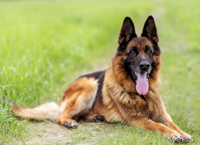

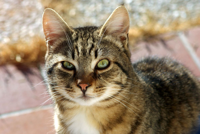

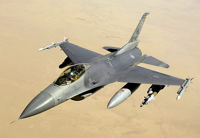

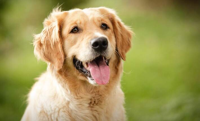

In [30]:
from PIL import Image


image1 = Image.open("AmitBenDavid91/dog3.jpg")
image1.thumbnail((200, 200))  # Resize while maintaining aspect ratio
display(image1)


image2 = Image.open("AmitBenDavid91/cat.jpg")
image2.thumbnail((200, 200))  # Resize while maintaining aspect ratio
display(image2)

image3 = Image.open("AmitBenDavid91/plane.jpg")
image3.thumbnail((200, 200))  # Resize while maintaining aspect ratio
display(image3)

image4 = Image.open("AmitBenDavid91/dog.jpg")
image4.thumbnail((200, 200))  # Resize while maintaining aspect ratio
display(image4)




In [32]:
if __name__ == '__main__':


    # List of image paths for multiple examples
    image_paths = ["AmitBenDavid91/dog3.jpg", "AmitBenDavid91/cat.jpg", "AmitBenDavid91/plane.jpg","AmitBenDavid91/dog.jpg"]
    json_path = "AmitBenDavid91/imagenet_class_index.json"

    # Load the model and class index only once for efficiency
    model = load_model()
    class_idx = load_class_index(json_path)

    # Iterate over each image and run the pipeline
    for image_path in image_paths:
        print(f"Processing image: {image_path}")
        image_tensor = preprocess_image(image_path)
        predicted_index, probabilities = predict_with_probabilities(model, image_tensor)
        label = get_label(class_idx, predicted_index)
        max_probability = probabilities[0, predicted_index].item()

        print(f"Predicted label: {label}")
        print(f"Probability for predicted label: {max_probability:.4f}\n")

        # Print the top 5 predictions sorted by probability
        print_top5_predictions(probabilities, class_idx)
        print("-" * 50)


Processing image: AmitBenDavid91/dog3.jpg
Predicted label: German_shepherd
Probability for predicted label: 0.7194

Top 5 Predictions:
Label: German_shepherd, Probability: 0.7194
Label: malinois, Probability: 0.2615
Label: Leonberg, Probability: 0.0109
Label: groenendael, Probability: 0.0020
Label: kelpie, Probability: 0.0008
--------------------------------------------------
Processing image: AmitBenDavid91/cat.jpg
Predicted label: tiger_cat
Probability for predicted label: 0.5339

Top 5 Predictions:
Label: tiger_cat, Probability: 0.5339
Label: tabby, Probability: 0.3924
Label: Egyptian_cat, Probability: 0.0726
Label: lynx, Probability: 0.0005
Label: lens_cap, Probability: 0.0001
--------------------------------------------------
Processing image: AmitBenDavid91/plane.jpg
Predicted label: warplane
Probability for predicted label: 0.9019

Top 5 Predictions:
Label: warplane, Probability: 0.9019
Label: projectile, Probability: 0.0321
Label: wing, Probability: 0.0299
Label: missile, Proba

## Results

We ran three examples in our pipeline:
- **Dog Image:** The model correctly identified the dog ("golden_retriever").
- **Dog Image 2:** The model correctly identified the dog ("German_shepherd").
- **Cat Image:** The model correctly recognized the cat ( "tiger_cat").
- **Warplane Image:** The model successfully detected the warplane.


# Conclusion

In this project, we successfully implemented an image classification pipeline using a pre-trained VGG-16 model in PyTorch. We covered the entire process, from loading the model and preprocessing the input image to running predictions and mapping the output to human-readable labels via a JSON mapping file.

Our experiments, which included classifying images of a dog, a cat, and a fighter plane, demonstrated that the pipeline works effectively. The model was able to accurately identify diverse classes, showcasing its robust feature extraction capabilities.

This project not only provides a practical application of deep learning techniques but also highlights the power of transfer learning. By leveraging a pre-trained model, we significantly reduced the complexity of the task while still achieving excellent performance.


Overall, this project serves as a strong foundation for further explorations in image classification and deep learning applications.
